20210130l_m2km.fits

collecting data
 - data shape: (6000, 246, 329); bias shape: (246, 329)
 - time: 5.24
data reduction
 - pupil image shape: (226, 226)
 - time: 7.10
cross correlating
 - cross-corr image shape: (1, 452, 452); auto-corr pupil image shape: (452, 452)
 - time: 85.00
creating gammas
 - 50 polychromatic turbulence layers from 0 to 50 km
 - time: 2.70
calculation initial parametrs
 - threshold: 0.0004; 23 peaks found
 - time: 0.34
approxing
 - initial guess for the parameters:
 Vx, m/s  Vy, m/s          Cn2    z, m
    0.00     0.00 7.102894e-14  2000.0
    0.66     5.75 7.459949e-15 10000.0
  -12.17   -12.39 3.358198e-14 10000.0
   -8.96   -10.29 1.385869e-14 10000.0
  -10.73   -10.29 4.409144e-14 10000.0
   -6.31    -7.41 6.577684e-14 10000.0
  -10.95    -6.64 1.542165e-14 10000.0
   -1.77    -5.97 7.556642e-15 10000.0
   -7.96    -5.75 5.549567e-14 10000.0
   -5.53    -5.31 3.680862e-14 10000.0
   -3.87    -4.31 1.504930e-14 10000.0
   -1.44    -3.98 6.335649e-15 10000

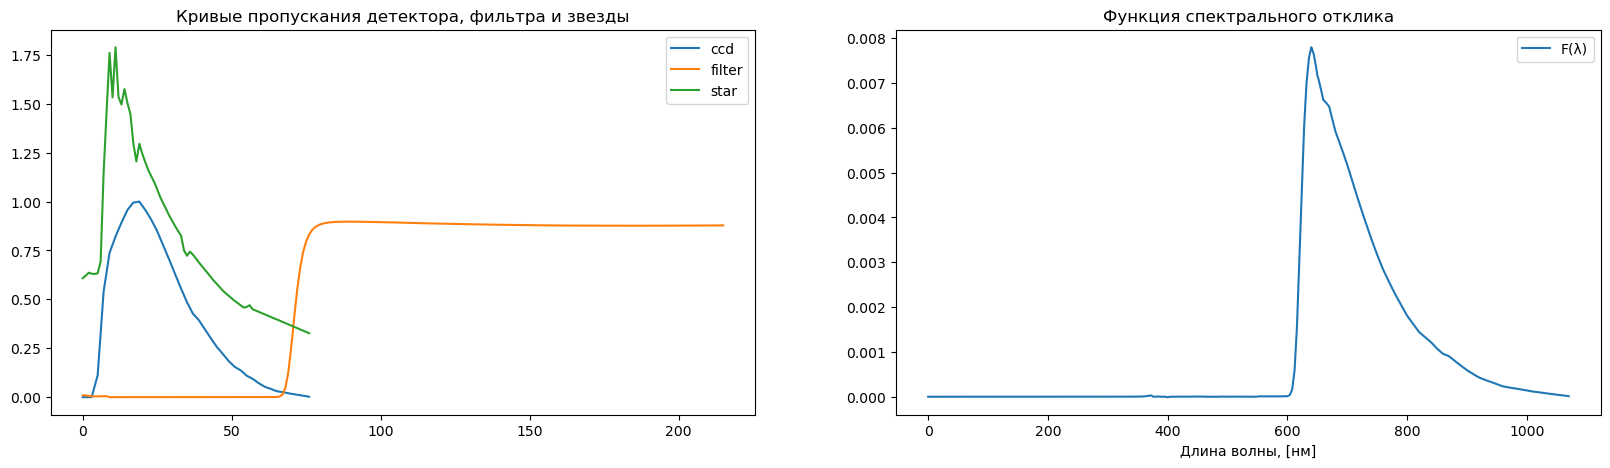

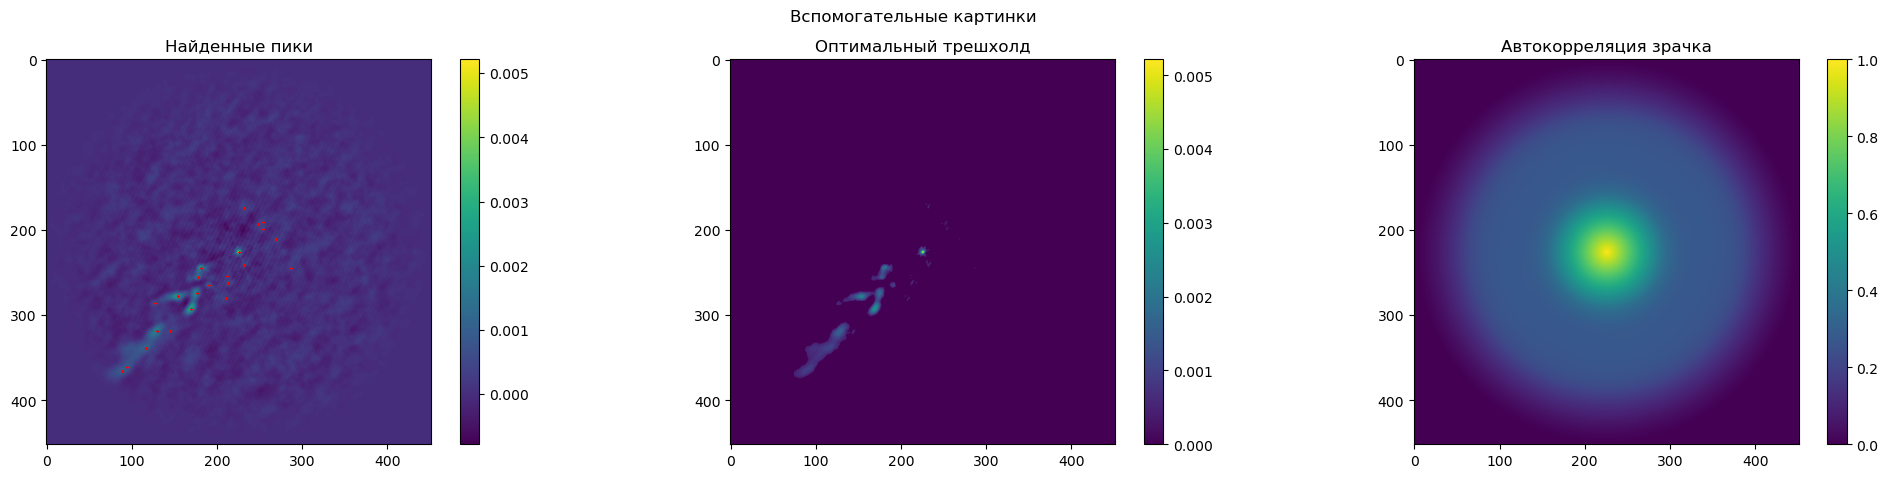

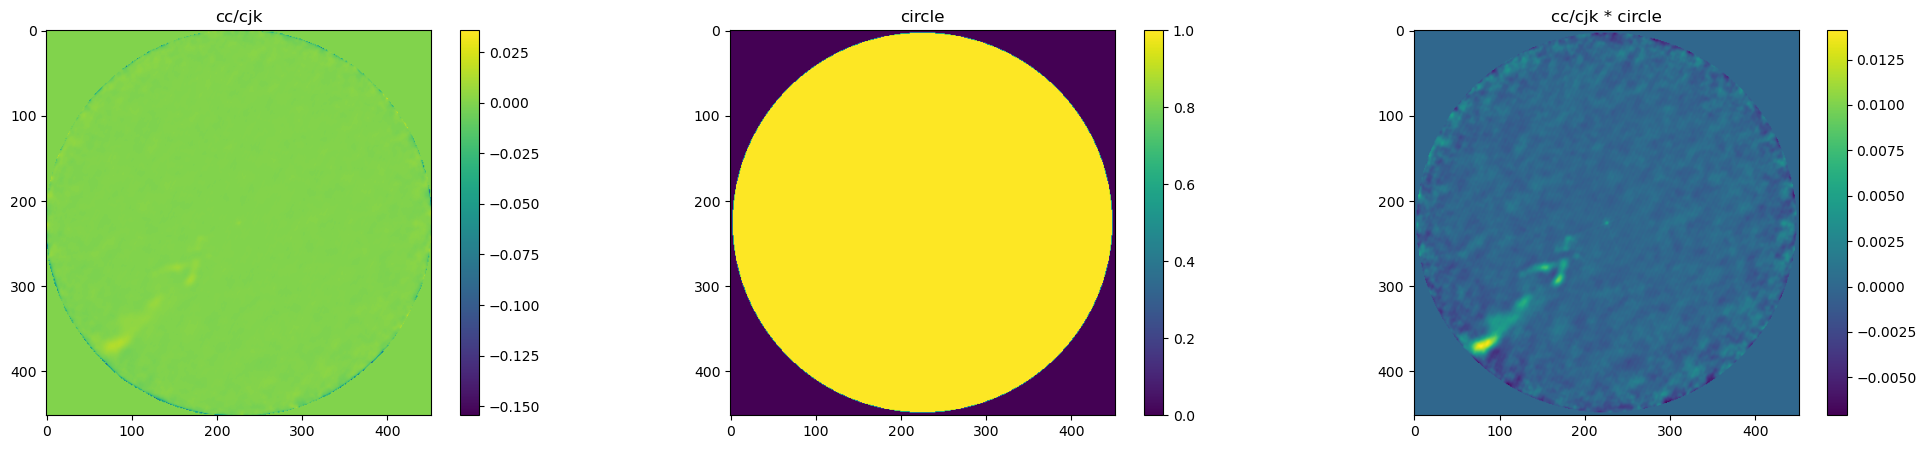

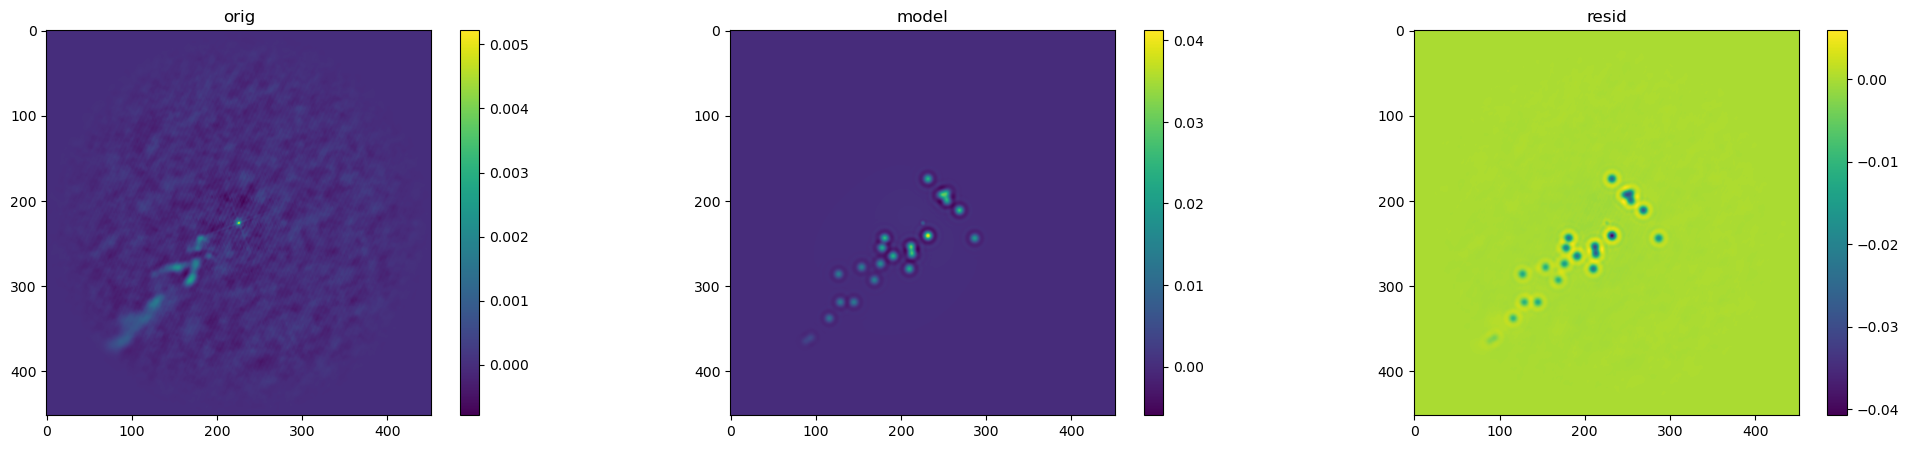

In [1]:
from main import processDomecam

file = '20210130l_m2km.fits'
file_bias = 'bias20210130.fits'
data_dir = 'D:/astro/domecam' # рабочая папка, все исходные файлы должны храниться в ней

'''
удоствовериться, что деление на cjk работает корректно
    - можно будет параметр sigma в curve fit передавать для этой области
        большие значения, чтобы "круг" занулялся
        
        !!! умножить итоговую модельную КК на веса (круг)

если я делаю cc/cjk то при создании гамм наверное не нужно делать res = res * cjk

можно попробовать перебрать разные значения дисперсии и посмотреть на результат.
и исправить реализацию аппроксимации, добавив 5ый параметр дисперсии
'''

latency = [10] # задержка для кросс-корреляции, [кадр]
conjugated_distance = 2 # сопряженное расстояние, [километр]
D = 2.5 # диаметр телескопа, [метр]
spectrum = 'poly' # тип излучения
lambda_ = 650*1e-9 # длина наблюдаемой волны света, [метр]

# для полихроматического излучения нужны кривые фильтра, детектора и звезды
file_filter = 'KC19_d16t4_Safonov.xls'
file_ccd = 'ccd_prosilica2.crv'
file_star = 'a05.sp'

processDomecam(file=file, file_bias=file_bias, data_dir=data_dir, 
               D=D, conjugated_distance=conjugated_distance, latency=latency,
               spectrum=spectrum, lambda_=lambda_, file_filter=file_filter, file_ccd=file_ccd, file_star=file_star)